方案一：
直接根据整体的时序数据提取特征，做分类预测，根据特征将数据分为哪一类

方案二：做回归预测，根据数据特征拟合材料的几个关键属性值；然后再和标准值对比，根据总体的差异判断属于哪一类

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备T')
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_S = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备S')
device_Z = pd.read_excel('./data/模型数据副本.xlsx',sheet_name = '设备Z')
del device_wob['时间/s']
del device_T['时间/s']
columns = ['材料2','材料4','材料5','材料7','材料8','材料10','材料11','材料13','材料55','材料21','材料22']
res_df = pd.DataFrame(columns=['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet','S','Z','res'])

for time in range(1050,1406,3):
    device_wob_temp = device_wob[(device_wob['time']>=time) & (device_wob['time']<(time+3))]
    device_T_temp = device_T[(device_T['time']>=time) & (device_T['time']<(time+3))]
    
    device_wob_temp_des = device_wob_temp[columns].describe()
    device_T_temp_des = device_T_temp[columns].describe()
    
    #每三钟算一组，统计特征,取少的这个device_T_mean
    for column in columns:
        wob_min = device_wob_temp_des[column]['min']
        wob_max = device_wob_temp_des[column]['max']
        wob_mean = device_wob_temp_des[column]['mean']
        wob_std = device_wob_temp_des[column]['std']
        wob_skew = device_wob_temp[column].skew()#偏度计算
        wob_kuet = device_wob_temp[column].kurt()#峰度计算        

        T_min = device_T_temp_des[column]['min']
        T_max = device_T_temp_des[column]['max']
        T_mean = device_T_temp_des[column]['mean']
        T_std = device_T_temp_des[column]['std']
        T_skew = device_T_temp[column].skew()#偏度计算
        T_kuet = device_T_temp[column].kurt()#峰度计算  


        S = device_S[column].values[0]
        Z = device_Z[column].values[0]
        res = column
        row = {'wob_min':wob_min,'wob_max':wob_max,'wob_mean':wob_mean,'wob_std':wob_std,'wob_skew':wob_skew,'wob_kuet':wob_kuet,'T_min':T_min,'T_max':T_max,'T_mean':T_mean,'T_std':T_std,'T_skew':T_skew,'T_kuet':T_kuet,'S':S,'Z':Z,'res':res}
        res_df.loc[len(res_df)] = row

res_df.head()

,wob_min,wob_max,wob_mean,wob_std,wob_skew,wob_kuet,T_min,T_max,T_mean,T_std,T_skew,T_kuet,S,Z,res
0,3.00286,3.65089,3.413814,0.236150,-1.001939,-0.280232,7.998,11.970,10.1435,1.191906,-0.029635,-0.159510,101.4,2.4,材料2
1,3.80704,4.15474,3.976719,0.126295,0.100818,-1.554364,8.413,10.248,9.3901,0.607808,-0.250214,-1.231008,71.5,2.8,材料4
2,4.08101,4.31455,4.213552,0.081998,-0.459574,-1.095551,15.572,18.853,16.9028,1.003761,0.619745,-0.064846,67.9,2.6,材料5
3,3.26430,5.01131,4.058786,0.532198,0.146446,-0.403349,5.894,9.269,6.8684,1.142407,1.465707,1.058720,65.7,"1,7",材料7
4,3.75266,3.96912,3.857168,0.071982,0.244940,-1.211552,12.974,14.166,13.4431,0.452866,0.748555,-0.928809,72.9,2.9,材料8


In [2]:
#关联基础属性数据
rock_character.head()

,序号,岩性名称,设备S,设备Z,静态抗压强度,弹性模量,泊松比,抗拉强度,黏聚力,内摩擦角,...,脆性指数,回弹均值,动态强度,滑动摩擦系数,声级,波速,密度均值,渗透率,孔隙度,粒径
0,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,...,20.47,62.0,193.00,0.153,115.7,5.49,2.86,0.001760,2.08,17.3
1,2,材料4,71.5,2.8,117.49,58.62,0.33,10.68,13.53,46.34,...,26.26,65.0,221.53,0.143,117.2,5.24,3.28,0.002290,2.09,16.6
2,3,材料5,67.9,2.6,126.65,72.11,0.27,12.67,21.09,44.90,...,23.65,67.0,256.95,0.147,118.1,6.76,3.45,0.000580,2.06,262.0
3,4,材料7,65.7,1.7,53.53,31.54,0.28,4.56,8.02,45.61,...,12.11,44.0,167.66,0.235,109.6,5.95,3.67,0.117604,14.49,219.0
4,5,材料8,72.9,2.9,164.87,53.87,0.23,5.76,12.01,44.17,...,33.14,72.0,365.95,0.121,119.5,4.72,4.32,0.002600,1.87,179.0


In [3]:
device_S

,材料2,材料4,材料5,材料7,材料8,材料10,材料11,材料13,材料55,材料21,材料22
0,101.4,71.5,67.9,65.7,72.9,69.3,75.2,70.8,68.7,64.5,78.1


In [4]:
res = pd.merge(left=res_df,right = rock_character, left_on = 'res', right_on ='岩性名称')
# 显示所有列
pd.set_option('display.max_columns', None)
res.head(n=10)

,wob_min,wob_max,wob_mean,wob_std,wob_skew,wob_kuet,T_min,T_max,T_mean,T_std,T_skew,T_kuet,S,Z,res,序号,岩性名称,设备S,设备Z,静态抗压强度,弹性模量,泊松比,抗拉强度,黏聚力,内摩擦角,拉强比,脆性指数,回弹均值,动态强度,滑动摩擦系数,声级,波速,密度均值,渗透率,孔隙度,粒径
0,3.00286,3.65089,3.413814,0.236150,-1.001939,-0.280232,7.998,11.970,10.143500,1.191906,-0.029635,-0.159510,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
1,2.94301,3.68661,3.445723,0.233032,-1.300229,1.825893,7.729,11.722,9.896000,1.476044,-0.212896,-1.272081,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
2,3.13777,3.58919,3.452857,0.162115,-0.970448,-0.402823,7.371,11.553,9.998000,1.337848,-0.663097,-0.087198,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
3,3.12568,3.66841,3.462618,0.197012,-0.965071,-0.315246,7.635,11.316,9.723333,1.133635,-0.272630,0.348469,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
4,3.09211,3.70193,3.497716,0.172160,-1.359834,3.232517,7.677,11.896,9.825100,1.427393,-0.221311,-1.061463,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
5,3.08004,3.70812,3.386474,0.185854,-0.200894,0.630906,7.814,11.970,9.915000,1.485106,0.265430,-1.271927,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
6,3.04238,3.75137,3.461536,0.196606,-0.667626,1.681516,8.141,11.822,9.702000,1.233535,0.315310,-1.174216,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
7,3.03917,3.79027,3.482330,0.211688,-0.872401,1.943167,8.035,11.601,9.445444,1.268357,0.692701,-0.957530,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
8,2.89840,3.75573,3.388337,0.271653,-0.691519,-0.109878,8.325,11.938,9.625500,1.370101,0.831022,-1.068247,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3
9,2.98792,3.81703,3.469089,0.291996,-0.227357,-1.116429,7.677,11.179,9.774333,1.163278,-0.742342,-0.561894,101.4,2.4,材料2,1,材料2,101.4,2.4,110.95,53.58,0.26,6.65,11.85,38.44,16.68,20.47,62.0,193.0,0.153,115.7,5.49,2.86,0.00176,2.08,17.3


In [5]:
res.columns

Index(['wob_min', 'wob_max', 'wob_mean', 'wob_std', 'wob_skew', 'wob_kuet',
       'T_min', 'T_max', 'T_mean', 'T_std', 'T_skew', 'T_kuet', 'S', 'Z',
       'res', '序号', '岩性名称', '设备S', '设备Z', '静态抗压强度', '弹性模量', '泊松比', '抗拉强度',
       '黏聚力', '内摩擦角', '拉强比', '脆性指数', '回弹均值', '动态强度', '滑动摩擦系数', '声级', '波速',
       '密度均值', '渗透率', '孔隙度', '粒径'],
      dtype='object')

The training time = 0.09999942779541016
The R2_score = 0.9915436169556285
The rmse of prediction is: 4.460396790358078


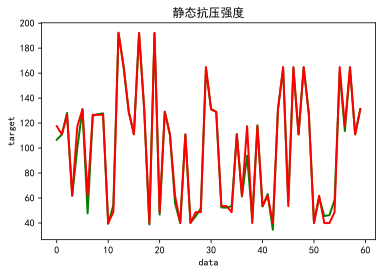

In [48]:
# del res['序号']
# del res['岩性名称']
# xgboost回归器
import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False


xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度"]
feature_name =X.columns
#将数据分割训练数据与测试数据
#print(np.isnan(X).any())
from sklearn.model_selection import train_test_split
# 随机采样20%的数据构建测试样本，其余作为训练样本
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
#{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
params = {'booster':'gbtree',
          'objective':'reg:squarederror',
          'eta':0.1,
          'gamma':0,
       #  'alpha':0,
       #  'lambda':3,
          'max_depth':7,
          'subsample':0.6849912226732566,
          'colsample_bytree':0.9269737580495006,
          'min_child_weight':1,
          'learning_rate':0.1970728149783871,
        #  'seed':1000,
          'nthread':1
          }
num_round = 50

start_time = time.time()
bst = xgb.train(params, dtrain, num_round)
end_time = time.time()
print('The training time = {}'.format(end_time - start_time))

bst_ypred = bst.predict(dtest)
r2score = r2_score(ytest, bst_ypred)
bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

print('The R2_score = {}'.format(r2score))
print('The rmse of prediction is:', bst_rmse)
#plot_importance(bst,importance_type="weight")
plt.figure()
plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("静态抗压强度")
plt.show()
plt.show()

The training time = 0.8380014896392822
The R2_score = 0.9485643482407106
The rmse of prediction is: 0.890926307051859


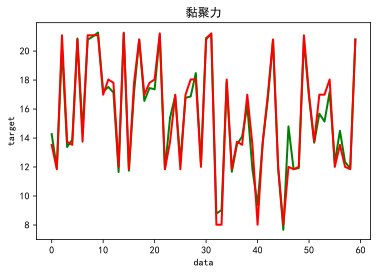

In [42]:
xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']

## X为所有变量
X = res[xx]
## Y为要预测的数值
y = res["黏聚力"]
feature_name =X.columns
#将数据分割训练数据与测试数据
#print(np.isnan(X).any())
from sklearn.model_selection import train_test_split
# 随机采样20%的数据构建测试样本，其余作为训练样本
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
dtest = xgb.DMatrix(Xtest,feature_names=feature_name)

params = {'booster':'gbtree',
          'objective':'reg:squarederror',
          'eta':0.1,
          'gamma':0,
          'alpha':0,
          'lambda':3,
          'max_depth':6,
          'subsample':0.7,
          'colsample_bytree':0.9,
          'min_child_weight':1,
          'learning_rate':0.1,
          'seed':1000,
          'nthread':1
          }
num_round = 500

start_time = time.time()
bst = xgb.train(params, dtrain, num_round)
end_time = time.time()
print('The training time = {}'.format(end_time - start_time))

bst_ypred = bst.predict(dtest)
r2score = r2_score(ytest, bst_ypred)
bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

print('The R2_score = {}'.format(r2score))
print('The rmse of prediction is:', bst_rmse)
#plot_importance(bst,importance_type="weight")
plt.figure()
plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("黏聚力")
plt.show()
plt.show()

The training time = 1.389829158782959
The R2_score = 0.9472275116459792
The rmse of prediction is: 1.381761332554371


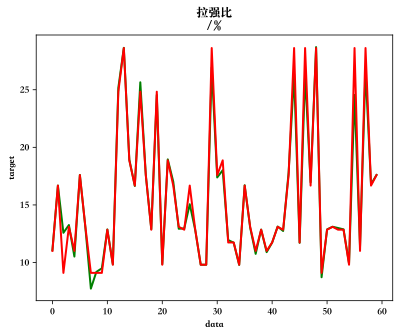

In [22]:
xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']

## X为所有变量
X = res[xx]
## Y为要预测的数值
y = res["拉强比\n/%"]
feature_name =X.columns
#将数据分割训练数据与测试数据
#print(np.isnan(X).any())
from sklearn.model_selection import train_test_split
# 随机采样20%的数据构建测试样本，其余作为训练样本
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
dtest = xgb.DMatrix(Xtest,feature_names=feature_name)

params = {'booster':'gbtree',
          'objective':'reg:squarederror',
          'eta':0.1,
          'gamma':0,
          'alpha':0,
          'lambda':3,
          'max_depth':6,
          'subsample':0.7,
          'colsample_bytree':0.9,
          'min_child_weight':1,
          'learning_rate':0.1,
          'seed':1000,
          'nthread':1
          }
num_round = 500

start_time = time.time()
bst = xgb.train(params, dtrain, num_round)
end_time = time.time()
print('The training time = {}'.format(end_time - start_time))

bst_ypred = bst.predict(dtest)
r2score = r2_score(ytest, bst_ypred)
bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

print('The R2_score = {}'.format(r2score))
print('The rmse of prediction is:', bst_rmse)
#plot_importance(bst,importance_type="weight")
plt.figure()
plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("拉强比\n/%")
plt.show()
plt.show()

In [65]:
res.to_csv('res_all.csv',index=False,encoding='utf-8-sig')

In [66]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']


# 加载数据集
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度σc/MPa"]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据预处理：对特征进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建SVR模型
# 注意：SVR的默认核函数是RBF（径向基函数），你可以通过kernel参数更改核函数
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 训练模型
svr_model.fit(X_train_scaled, y_train)

# 进行预测
y_pred = svr_model.predict(X_test_scaled)

# 评估模型
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("均方误差(MSE):", mse)
print('R方：', r2score)
print('rmse:', bst_rmse)


均方误差(MSE): 783.1521620608822
R方： 0.6557053709771413
rmse: 27.984855941399488


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# 加载数据集
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度σc/MPa"]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型
# n_estimators表示树的数量，max_depth表示树的最大深度
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# 训练模型
rf_regressor.fit(X_train, y_train)

# 使用模型进行预测
y_pred = rf_regressor.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("均方误差(MSE):", mse)
print('R方：', r2score)
print('rmse:', bst_rmse)

均方误差(MSE): 43.34981460072534
R方： 0.9809422624884407
rmse: 6.5840576091590615


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# 加载数据集
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度σc/MPa"]


# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建GBDT回归模型
# n_estimators表示要训练的树的数量，max_depth表示每棵树的最大深度
gbdt_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# 训练模型
gbdt_regressor.fit(X_train, y_train)

# 使用模型进行预测
y_pred = gbdt_regressor.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("均方误差(MSE):", mse)
print('R方：', r2score)
print('rmse:', bst_rmse)

均方误差(MSE): 66.75472824964271
R方： 0.9706528366878904
rmse: 8.170356678238882


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# 加载数据集
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度σc/MPa"]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建AdaBoost回归模型，使用决策树作为基学习器
# n_estimators表示要训练的弱学习器的数量
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                  n_estimators=100, random_state=42)

# 训练模型
ada_regressor.fit(X_train, y_train)

# 使用模型进行预测
y_pred = ada_regressor.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
bst_rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("均方误差(MSE):", mse)
print('R方：', r2score)
print('rmse:', bst_rmse)

均方误差(MSE): 67.4506798966619
R方： 0.9703468777366978
rmse: 8.21283628819313


In [33]:
import random
import numpy as np
from deap import base, creator, tools
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度"]

# 初始化creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 假设您已经有了如下参数范围
param_bounds = {
    'max_depth': (3, 10),  # 对于需要整数的参数，我们将使用randint
    'learning_rate': (0.01, 0.3),
    'subsample': (0.05, 1.0),
    'colsample_bytree': (0.05, 1.0),
}

# 初始化toolbox
toolbox = base.Toolbox()

# 注册属性生成器
toolbox.register("attr_max_depth", random.randint, *param_bounds['max_depth'])  # 整数生成器
for key, bound in filter(lambda item: item[0] != 'max_depth', param_bounds.items()):
    min_value, max_value = bound
    toolbox.register(f"attr_{key}", random.uniform, min_value, max_value)

# 创建个体生成器
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [(toolbox.attr_max_depth if key == 'max_depth' else getattr(toolbox, f"attr_{key}"))
                  for key in param_bounds.keys()],
                 n=1)

# 创建种群生成器
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册适应度函数
def eval_fitness(individual):
    params = dict(zip(param_bounds.keys(), individual))
    
    params['max_depth'] = int(params['max_depth'])
    params['learning_rate'] = params['learning_rate'] if (0 < params['learning_rate'] < 1) else random.uniform(0.1,0.3)
    params['subsample'] = params['subsample'] if (0< params['subsample']< 1) else random.uniform(0,1)
    params['colsample_bytree'] = params['colsample_bytree'] if (0< params['colsample_bytree']< 1) else random.uniform(0,1)
    
    print(params)
    # 使用新的参数训练模型
    model = XGBRegressor(**params)
    
    # 训练集和测试集划分保持不变
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
    dtrain = xgb.DMatrix(Xtrain, ytrain, feature_names=feature_name)
    dtest = xgb.DMatrix(Xtest, feature_names=feature_name)
    
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)

    # 使用R²分数作为适应度函数
    fitness = r2_score(ytest, predictions)
    
    return fitness,

toolbox.register("evaluate", eval_fitness)

# 注册选择、交叉和变异算子
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)

# 设置遗传算法参数
POPULATION_SIZE = 50
MAX_GENERATIONS = 50
CXPB = 0.7
MUTPB = 0.2

# 运行遗传算法
pop = toolbox.population(n=POPULATION_SIZE)

for g in range(MAX_GENERATIONS):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

# 找到最优个体及其对应的参数
best_individual = tools.selBest(pop, 1)[0]
best_params = dict(zip(param_bounds.keys(), best_individual))

# 输出最佳参数和对应的R²分数
print(f"Best Parameters: {best_params}")
print(f"Best Fitness (R² Score): {best_individual.fitness.values[0]}")

D:\ProgramFile\MiniConda\envs\yjclassify\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\ProgramFile\MiniConda\envs\yjclassify\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


{'max_depth': 6, 'learning_rate': 0.2322413693534741, 'subsample': 0.8421088434910877, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 5, 'learning_rate': 0.1880988042968762, 'subsample': 0.9635321189039381, 'colsample_bytree': 0.4496129929488665}
{'max_depth': 6, 'learning_rate': 0.2724533428974198, 'subsample': 0.204772485342471, 'colsample_bytree': 0.5596760378418647}
{'max_depth': 8, 'learning_rate': 0.23256855037919494, 'subsample': 0.2017184447342546, 'colsample_bytree': 0.7246542122607763}
{'max_depth': 9, 'learning_rate': 0.1934019883495492, 'subsample': 0.9059248149268391, 'colsample_bytree': 0.8346776460725288}
{'max_depth': 3, 'learning_rate': 0.19527093539656132, 'subsample': 0.3891012166426169, 'colsample_bytree': 0.6265166536302876}
{'max_depth': 3, 'learning_rate': 0.12813776903288562, 'subsample': 0.9790777775440968, 'colsample_bytree': 0.643668149233696}
{'max_depth': 10, 'learning_rate': 0.1879350916209322, 'subsample': 0.5411181066035146, 'colsample_bytree': 0.

{'max_depth': 10, 'learning_rate': 0.19527093539656132, 'subsample': 0.3891012166426169, 'colsample_bytree': 0.7105164328982179}
{'max_depth': 4, 'learning_rate': 0.04935498341932675, 'subsample': 0.6698626870514551, 'colsample_bytree': 0.8511455265391773}
{'max_depth': 5, 'learning_rate': 0.11241555832605844, 'subsample': 0.940777786176329, 'colsample_bytree': 0.5773400828195194}
{'max_depth': 8, 'learning_rate': 0.20479419862935833, 'subsample': 0.9635321189039381, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 10, 'learning_rate': 0.11241555832605844, 'subsample': 0.9635321189039381, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 5, 'learning_rate': 0.19527093539656132, 'subsample': 0.3891012166426169, 'colsample_bytree': 0.8511455265391773}
{'max_depth': 4, 'learning_rate': 0.20119473760611373, 'subsample': 0.6259110086729036, 'colsample_bytree': 0.643668149233696}
{'max_depth': 10, 'learning_rate': 0.0317992817583598, 'subsample': 0.9790777775440968, 'colsample_bytre

{'max_depth': 6, 'learning_rate': 0.20738390442179336, 'subsample': 0.9059248149268391, 'colsample_bytree': 0.8346776460725288}
{'max_depth': 8, 'learning_rate': 0.2322413693534741, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 10, 'learning_rate': 0.04935498341932675, 'subsample': 0.9059248149268391, 'colsample_bytree': 0.7105164328982179}
{'max_depth': 10, 'learning_rate': 0.1934019883495492, 'subsample': 0.6698626870514551, 'colsample_bytree': 0.8346776460725288}
{'max_depth': 6, 'learning_rate': 0.20738390442179336, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 8, 'learning_rate': 0.11823942358855852, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 6, 'learning_rate': 0.17944425213071885, 'subsample': 0.9635321189039381, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 5, 'learning_rate': 0.20738390442179336, 'subsample': 0.9635321189039381, 'colsample_bytre

{'max_depth': 8, 'learning_rate': 0.11823942358855852, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 5, 'learning_rate': 0.17944425213071885, 'subsample': 0.9635321189039381, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 9, 'learning_rate': 0.19527093539656132, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 5, 'learning_rate': 0.17944425213071885, 'subsample': 0.9635321189039381, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 8, 'learning_rate': 0.11823942358855852, 'subsample': 0.8421088434910877, 'colsample_bytree': 0.8852240336312663}
{'max_depth': 4, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 6, 'learning_rate': 0.20738390442179336, 'subsample': 0.6849912226732566, 'colsample_bytree'

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 8, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.11823942358855852, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 9, 'learning_rate': 0.1970728149783871, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.20738390442179336, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 8, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 9, 'learning_rate': 0.1970728149783871, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.36053010963145604}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.7009488903080625, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.7049295107299003, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.3050123552577443, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.047784271762501995}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.7409911742136036, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.16

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6586678366254032, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.14126733951445042, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9

{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.92

The training time = 0.10813069343566895
The R2_score = 0.9915436169556285
The rmse of prediction is: 4.460396790358078


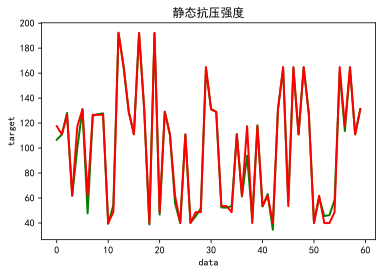

In [49]:
import xgboost as xgb
from xgboost import plot_importance,plot_tree
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False


xx = ['wob_min','wob_max','wob_mean','wob_std','wob_skew','wob_kuet','T_min','T_max','T_mean','T_std','T_skew','T_kuet']
X = res[xx]
## Y为要预测的数值
y = res["静态抗压强度"]
feature_name =X.columns
#将数据分割训练数据与测试数据
#print(np.isnan(X).any())
from sklearn.model_selection import train_test_split
# 随机采样20%的数据构建测试样本，其余作为训练样本
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=1)

dtrain = xgb.DMatrix(Xtrain, ytrain,feature_names=feature_name)
dtest = xgb.DMatrix(Xtest,feature_names=feature_name)
#{'max_depth': 7, 'learning_rate': 0.1970728149783871, 'subsample': 0.6849912226732566, 'colsample_bytree': 0.9269737580495006}
params = {'booster':'gbtree',
          'objective':'reg:squarederror',
          'eta':0.1,
          'gamma':0,
       #  'alpha':0,
       #  'lambda':3,
          'max_depth':7,
          'subsample':0.6849912226732566,
          'colsample_bytree':0.9269737580495006,
          'min_child_weight':1,
          'learning_rate':0.1970728149783871,
        #  'seed':1000,
          'nthread':1
          }
num_round = 50

start_time = time.time()
bst = xgb.train(params, dtrain, num_round)
end_time = time.time()
print('The training time = {}'.format(end_time - start_time))



# 保存模型
bst.save_model("model_静态抗压强度.xgb")  # 将模型保存为model.xgb文件

# 加载已保存的模型
loaded_bst = xgb.Booster()
loaded_bst.load_model("model_静态抗压强度.xgb")  # 从model.xgb文件加载模型

# 使用加载后的模型进行预测
bst_ypred = loaded_bst.predict(dtest)
r2score = r2_score(ytest, bst_ypred)
bst_rmse = mean_squared_error(ytest, bst_ypred) ** 0.5

print('The R2_score = {}'.format(r2score))
print('The rmse of prediction is:', bst_rmse)
#plot_importance(bst,importance_type="weight")
plt.figure()
plt.plot(range(60), bst_ypred[:60], c="g", label="ypred", linewidth=2)
plt.plot(range(60), ytest[:60], c="r", label="ytest", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("静态抗压强度")
plt.show()
plt.show()

In [51]:
#cnn加bp
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 假设有多个这样的样本，下面只是一个样本的示例
T = np.array([11.48, 9.597, 10.277, 11.4, 7.998, 9.718, 10.092, 11.97, 9.343, 9.56]).reshape(1, -1, 1)  # 转换为(样本数, 时间步长, 特征数)的形状
wob = np.array([3.52979, 3.5755, 3.02758, 3.65089, 3.30212, 3.63342, 3.38165, 3.46744, 3.56689, 3.00286]).reshape(1, -1, 1)

# 将T和wob拼接为一个多通道输入
input_data = np.concatenate((T, wob), axis=-1)  # 形状变为(样本数, 时间步长, 特征数*2)

# 假设目标输出是一个单一值
output_data = np.array([102]).reshape(-1, 1)

# 构建模型
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_data.shape[1:]))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # 对于回归问题，最后的输出层通常使用线性激活函数

model.compile(loss='mean_squared_error', optimizer='adam')  # 假设是回归问题，使用均方误差损失函数和Adam优化器

# 假设你有很多这样的样本，需要将它们整理成X_train和y_train
# X_train = np.concatenate((...), axis=0)  # 按样本拼接
# y_train = np.concatenate((..., output_data), axis=0)  # 按样本拼接

# 训练模型（这里仅用一个样本演示，实际应使用多个样本）
model.fit(input_data, output_data, epochs=100, batch_size=1, verbose=0)  # 根据实际情况调整epochs和batch_size

# 预测
prediction = model.predict(input_data)

print("预测结果：", prediction)

ModuleNotFoundError: No module named 'tensorflow'